In [125]:
import matplotlib.pyplot as plt
import numpy as np
import sympy as sym
import scipy as s
import pandas as pd

In [6]:
def linfunc(x,A,B):
    return A*x + B

In [9]:
inc_rad = 0.02/2

# Caracterización

In [4]:
A = np.array([-1980,-1540,-1140,-760,-360,464,816,1230,1660,2080])
rad1 = np.array([-0.5,-0.4,-0.3,-0.2,-0.1,0.1,0.2,0.3,0.4,0.5])

In [18]:
np.array([inc_rad]*len(A))

array([0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01])

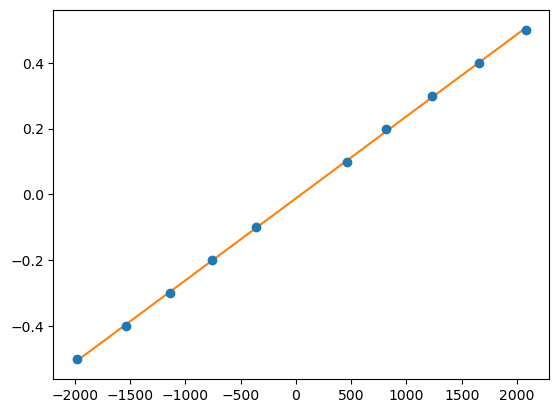

In [20]:

plt.errorbar(A,rad1,fmt="o",xerr=np.array([10]*len(A)),yerr=np.array([inc_rad]*len(A)))

params1, pcov1 = s.optimize.curve_fit(linfunc,A,rad1)

plt.plot(A, linfunc(A,*params1))

In [21]:
params1, np.sqrt(np.diag(pcov1))

(array([ 0.0002489 , -0.01169813]), array([1.26148627e-06, 1.68184334e-03]))

In [22]:
adjust = params1[1]

# Actividad 1

In [25]:
rad2 = np.array([1.34,2.18,2.6,2.8,3.22,3.42,3.82,4.62]) + adjust
mass = np.array([-400,-200,-100,-50,50,100,200,400])
torque = 2*mass*9.81*12.6e-3/1000
torque

array([-0.0988848, -0.0494424, -0.0247212, -0.0123606,  0.0123606,
        0.0247212,  0.0494424,  0.0988848])

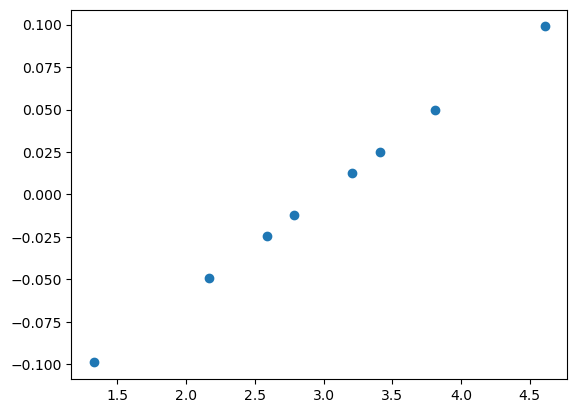

In [29]:
plt.scatter(rad2,torque)

params2, pcov2 = s.optimize.curve_fit(linfunc,rad2,torque)


In [30]:
params2, np.sqrt(np.diag(pcov2))

(array([ 0.06026778, -0.18009832]), array([0.00032528, 0.00101952]))

# Actividad 2

In [36]:
N = np.array([0,2,4,6,8])
T = np.array([1.16,1.3,1.44,1.56,1.68])
T_scale = T/(2*np.pi)
T_scale_2 = T_scale**2

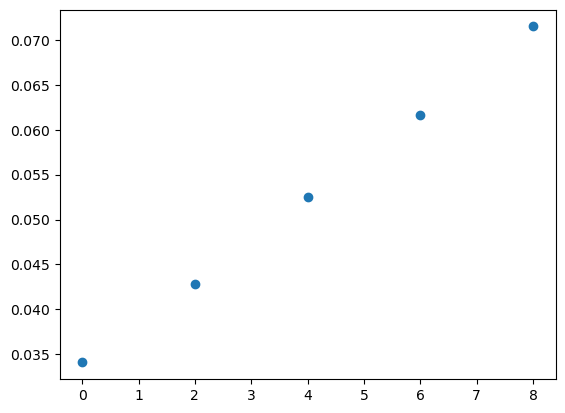

In [37]:
plt.scatter(N,T_scale_2)

params3, pcov3 = s.optimize.curve_fit(linfunc,N,T_scale_2)

In [38]:
params3, np.sqrt(np.diag(pcov3))

(array([0.00468256, 0.03378048]), array([5.19141315e-05, 2.54326264e-04]))

In [56]:
R2 = 0.047
R1 = 0.022
M = 0.212

delta_I = M * (R1**2 + R2**2)/2
I = 1 * (13e-2/2)**2 /2
kappa_teo = 0.058

delta_I, I

(0.000285458, 0.0021125000000000002)

In [57]:
delta_I_exp = params3[0]*kappa_teo
delta_I_exp

0.00027158839311017984

In [58]:
I_exp = params3[1]*kappa_teo
I_exp

0.0019592679923590033

# Actividad 3

In [118]:
sigma_I = 0.01
I1 = np.array([-2, -1.75, -1.5, -1.25, -1, -0.75, -0.5, -0.24, 0, 0.24, 0.5, 0.75, 1, 1.26, 1.5, 1.75, 2])

In [119]:
rad3 = np.array([2.12, 2.18, 2.26, 2.34, 2.42, 2.54, 2.68, 2.84, 3, 3.22, 3.32, 3.46, 3.58, 3.68, 3.74, 3.82, 3.88]) + adjust
params4, pcov4 = s.optimize.curve_fit(linfunc,I1,rad3)

Residuals = (rad3 - linfunc(I1,*params4))

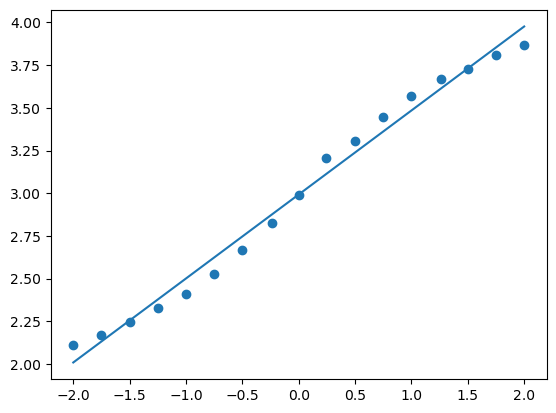

In [120]:
plt.scatter(I1,rad3)
plt.plot(I1,linfunc(I1,*params4))

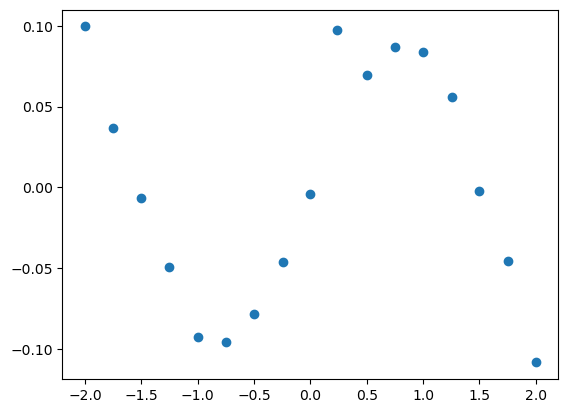

In [123]:
plt.scatter(I1,Residuals)

In [122]:
params4, np.sqrt(np.diag(pcov4))

(array([0.49197759, 2.99271835]), array([0.01494222, 0.0183059 ]))

In [124]:
k_teo = 3234e-6
params4[0]*kappa_teo/k_teo, np.sqrt(np.diag(pcov4))[0]*kappa_teo/k_teo

(8.82334580335538, 0.2679804563940194)

# ACTIVIDAD 4

In [314]:
def subamort(x,A,B,C,D,E):
    return A*np.exp(B*x)*np.cos(C*x + D) + E

In [315]:
data_sub1 = pd.read_excel(io = "Datos.xlsx", sheet_name = 1,engine="openpyxl", names=["t", "V"], header=None)

In [316]:
data_sub1 = data_sub1[400:1500].reset_index()

time1 = data_sub1["t"].to_numpy()
V1 = data_sub1["V"].to_numpy()

In [317]:
params5, pcov5 = s.optimize.curve_fit(subamort,time1,V1,maxfev = 20000)

In [318]:
params5, np.sqrt(np.diag(pcov5))

(array([  2.5574191 ,  -0.15053643,   5.41717685, -12.533859  ,
          0.4725395 ]),
 array([0.0047923 , 0.00025707, 0.00026168, 0.00193764, 0.00034769]))

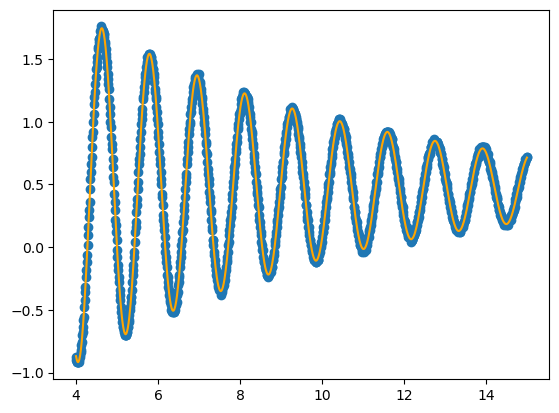

In [319]:
plt.plot(time1,subamort(time1,*params5), color="orange")
plt.scatter(time1, V1)

In [320]:
Q1 = np.sqrt(params5[2]**2+(params5[1]/2)**2)/np.abs(params5[1])
Q1

35.989292063054144

In [321]:
data_sub2 = pd.read_excel(io = "Datos.xlsx", sheet_name = "Sub2",engine="openpyxl", names=["t", "V"], header=None)

data_sub2 = data_sub2[230:800].reset_index()

time2 = data_sub2["t"].to_numpy()
V2 = data_sub2["V"].to_numpy()

In [322]:
params6, pcov6 = s.optimize.curve_fit(subamort,time2,V2,maxfev = 20000)

params5, np.sqrt(np.diag(pcov5))

(array([  2.5574191 ,  -0.15053643,   5.41717685, -12.533859  ,
          0.4725395 ]),
 array([0.0047923 , 0.00025707, 0.00026168, 0.00193764, 0.00034769]))

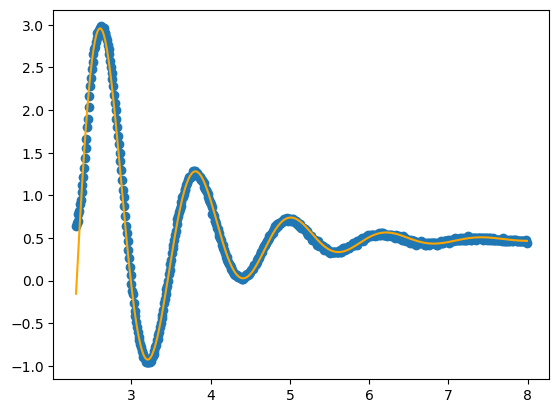

In [323]:
plt.plot(time2,subamort(time2,*params6), color="orange")
plt.scatter(time2, V2)

In [324]:
Q2 = np.sqrt(params6[2]**2+(params6[1]/2)**2)/np.abs(params6[1])
Q2

5.581663271857334

In [325]:
data_sub3 = pd.read_excel(io = "Datos.xlsx", sheet_name = "Sub3",engine="openpyxl", names=["t", "V"], header=None)

data_sub3 = data_sub3[80:800].reset_index()

time3 = data_sub3["t"].to_numpy()
V3 = data_sub3["V"].to_numpy()

In [326]:
params7, pcov7 = s.optimize.curve_fit(subamort,time3,V3,maxfev = 20000)

params7, np.sqrt(np.diag(pcov7))

(array([  5.40323069,  -0.33873747,   5.33360544, -17.17136013,
          0.48635791]),
 array([0.12353767, 0.00655178, 0.00616328, 0.02049264, 0.00667279]))

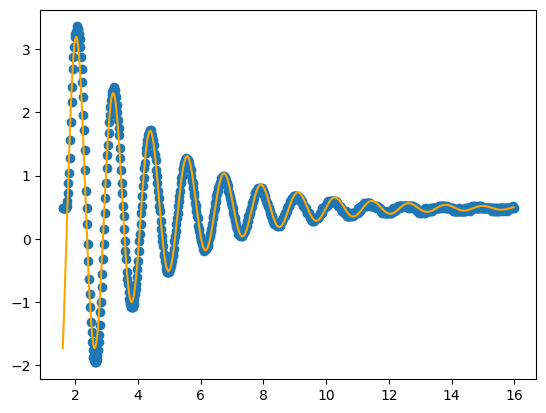

In [327]:
plt.plot(time3,subamort(time3,*params7), color="orange")
plt.scatter(time3, V3)

In [328]:
Q3 = np.sqrt(params7[2]**2+(params7[1]/2)**2)/np.abs(params7[1])
Q3

15.753480035382506

In [517]:
def critic(x,A,B,C,D,E):
    return np.exp(-A*(x+E))*(B + C*(x+E)) + D

def sobreamort(x,A,B,C,D,E,F):
    return A*np.exp(-B*(x+F)) + C*np.exp(B*(x+F))*np.exp(-D*(x+F)) + E

In [518]:
data_crit = pd.read_excel(io = "Datos.xlsx", sheet_name = "Crit",engine="openpyxl", names=["t", "V"], header=None)

data_crit = data_crit[115:160].reset_index()

time4 = data_crit["t"].to_numpy()
V4 = data_crit["V"].to_numpy()

In [520]:
params8, pcov8 = s.optimize.curve_fit(critic,time4,V4,maxfev = 200000)

params8, np.sqrt(np.diag(pcov8))

C:\Users\Acer\AppData\Local\Temp\ipykernel_12068\3731062073.py:2: RuntimeWarning: overflow encountered in exp
  return np.exp(-A*(x+E))*(B + C*(x+E)) + D


(array([ 1.74929846e-02, -1.02978257e+04, -4.87637640e+02,  1.48383384e+04,
         3.27897804e+01]),
 array([5.43679436e-01, 1.04628437e+06, 3.35986929e+04, 9.30670111e+05,
        3.55102544e+03]))

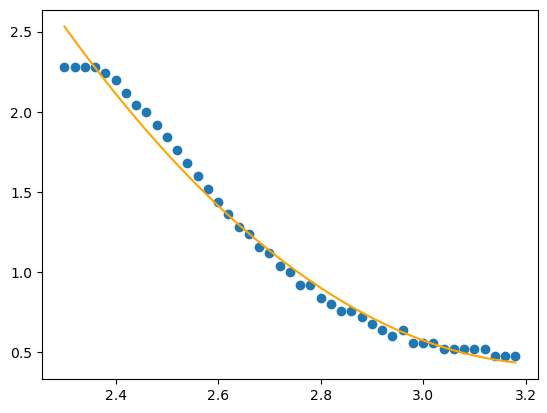

In [521]:
plt.plot(time4,critic(time4,*params8), color="orange")
plt.scatter(time4, V4)

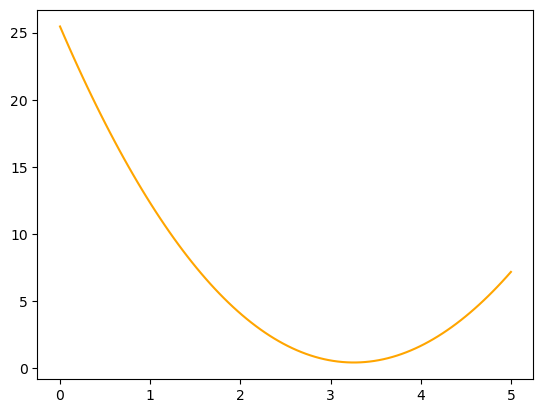

In [522]:
plt.plot(np.linspace(0,5,100),critic(np.linspace(0,5,100),*params8), color="orange")

In [355]:
data_sobre = pd.read_excel(io = "Datos.xlsx", sheet_name = "Sobre",engine="openpyxl", names=["t", "V"], header=None)

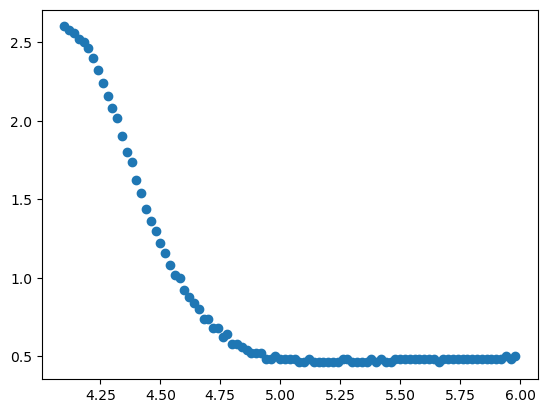

In [364]:
plt.scatter(data_sobre["t"][205:300],data_sobre["V"][205:300])